In [1]:
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors

RDKit WARNING: [09:19:02] Enabling RDKit 2019.09.3 jupyter extensions
[09:19:02] Enabling RDKit 2019.09.3 jupyter extensions


元のデータ

http://phenol-explorer.eu/downloads

Structures for Polyphenols having composition data (SMILES)をダウンロード

In [2]:
#データの呼び出し

df = pd.read_csv('data/compounds-structures.csv')
df.head(1)

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.58,C32H31O14,NaN,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC


In [3]:
df.shape

(492, 10)

In [4]:
PandasTools.AddMoleculeColumnToFrame(df, "smiles")

,smiles,ROMol
0,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,

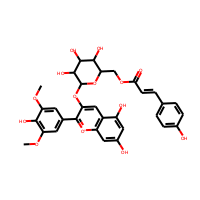

In [5]:
df[['smiles', 'ROMol']].head(1)

In [6]:
df["MolLogP"] = df["ROMol"].map(Descriptors.MolLogP)
df["qed"] = df["ROMol"].map(Descriptors.qed)
df["ExactMolWt"] = df["ROMol"].map(Descriptors.ExactMolWt)
df["fr_phenol"] = df["ROMol"].map(Descriptors.fr_phenol)
df["fr_methoxy"] = df["ROMol"].map(Descriptors.fr_methoxy)
df["fr_lactone"] = df["ROMol"].map(Descriptors.fr_lactone)
df["fr_urea"] = df["ROMol"].map(Descriptors.fr_urea)

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at,ROMol,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.580,C32H31O14,NaN,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC,,2.6635,0.079643,639.170832,4,2,0,0
1,5,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,Flavonoids,Anthocyanins,Delphinidin 3-O-(6''-acetyl-galactoside),507.421,C23H23O13,NaN,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC,,0.6584,0.135324,507.113317,5,0,0,0
2,6,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,Flavonoids,Anthocyanins,Cyanidin 3-O-(6''-acetyl-galactoside),491.422,C23H23O12,NaN,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC,,0.9528,0.151747,491.118403,4,0,0,0

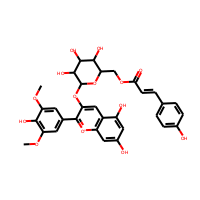
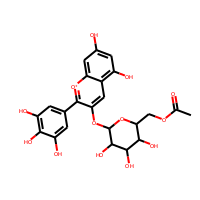
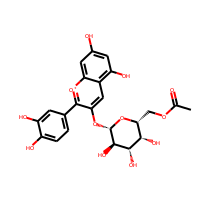

In [7]:
df.head(3)

In [8]:
# ROMolの削除

In [9]:
df = df.drop('ROMol', axis=1)

In [10]:
df.to_csv('data/output.csv', index=False)

In [11]:
ls data/

compounds-structures.csv  output.csv
lunch_box.csv             processed_datamart.csv
